In [1]:
import numpy as np
from gzip import open # NB: overrides standard open()
import pickle as pkl
import pandas as pd
import warnings 
from glob import glob
import os
import math
import functools
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from numpy import linalg as LA
from sklearn.metrics import r2_score
from sklearn.base import BaseEstimator
from sklearn.base import RegressorMixin
import math
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
import matplotlib as mpl

In [2]:
from PRPlot import PRPlot
from MetrPlot import MetrPlot

In [3]:
warnings.simplefilter('ignore')

In [7]:
from npls import npls

## Take data

In [83]:
d=np.load('2021-11-17.npz')

In [55]:
d.files

['X', 'Y', 'Em', 'Ex', 'B0', 'C0']

In [8]:
def flatten(x):
    sh = x.shape
    return x.reshape(sh[0:len(sh)-1])

Centering and cross-validation

Synthetic

In [134]:
X=d['X']
X*=1e7
trtrt=X.mean(axis = 0)
y=d['Y'][:,2]
X -= X.mean(axis = 0)
y*=1e1

In [135]:
(max(y)-min(y))/1e1

0.9777167392785486

In [136]:
aaa=y.mean()

In [137]:
y -= y.mean()

In [138]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1428, random_state=42)

Fitting

In [14]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score, make_scorer
import sklearn

In [168]:
npls1=npls()
scoring={'mse': make_scorer(mean_squared_error),'r2':'r2'}
parametrsNames={'n_components': [4],
                #
                'a': np.logspace(9, 11.1,num = 81)}

In [169]:


%%time
gridCought=GridSearchCV(npls1, parametrsNames, cv=5, scoring=scoring,refit='r2', return_train_score=True)
gridCought.fit(X_train.copy(),y_train.copy())

#gridCought.fit(X, y)
r2_p=gridCought.score(X_test.copy(), y_test.copy())
mse_cv=gridCought.cv_results_[ "mean_test_mse" ]
mse_c=gridCought.cv_results_[ "mean_train_mse" ]
r2_cv=gridCought.cv_results_[ "mean_test_r2" ]
r2_c=gridCought.cv_results_[ "mean_train_r2" ]
#predictors=gridCought.predict(X_test.copy())



CPU times: user 47.8 s, sys: 134 ms, total: 48 s
Wall time: 2min 34s


In [117]:
predictors=gridCought.predict(X)

In [118]:
predictors+=aaa
y+=aaa

In [119]:
y/=1e1
predictors/=1e1

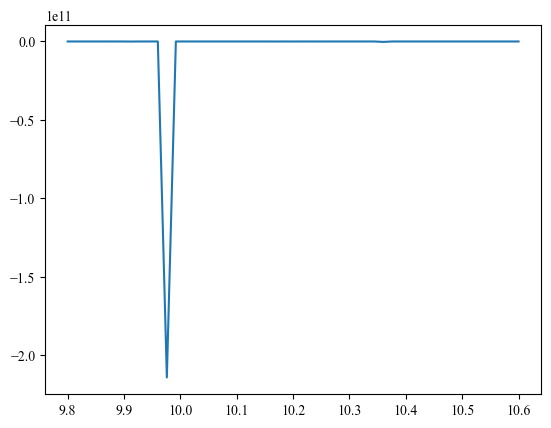

In [160]:
plt.plot(np.linspace(9.8, 10.6,num = 51),r2_cv)
plt.show()

In [170]:
bad_interval=MetrPlot(y_name="$\\frac {RMSE}{concentration\ range}$",
                   x_name="Regularization coefficient",save_name="Bad_third_synth_RMSE")

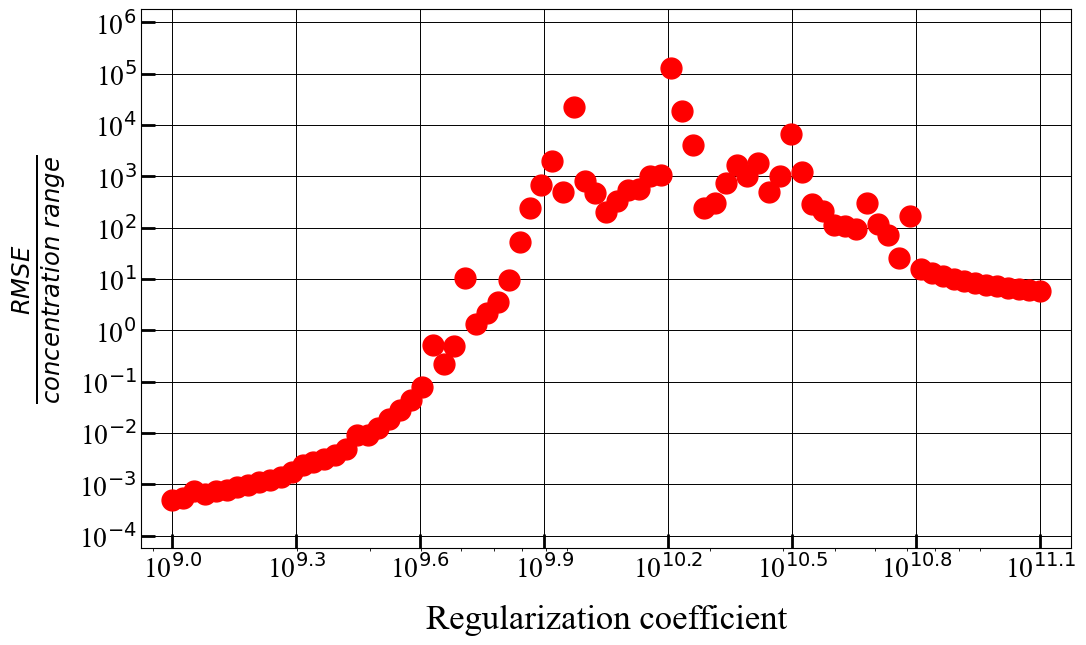

In [172]:
vv=bad_interval.main(x=np.logspace(9, 11.1,num = 81),
                  y=(mse_cv**0.5)/0.9777167392785486,
                  save=True)

Predict-reference 

In [123]:
pr=PRPlot()

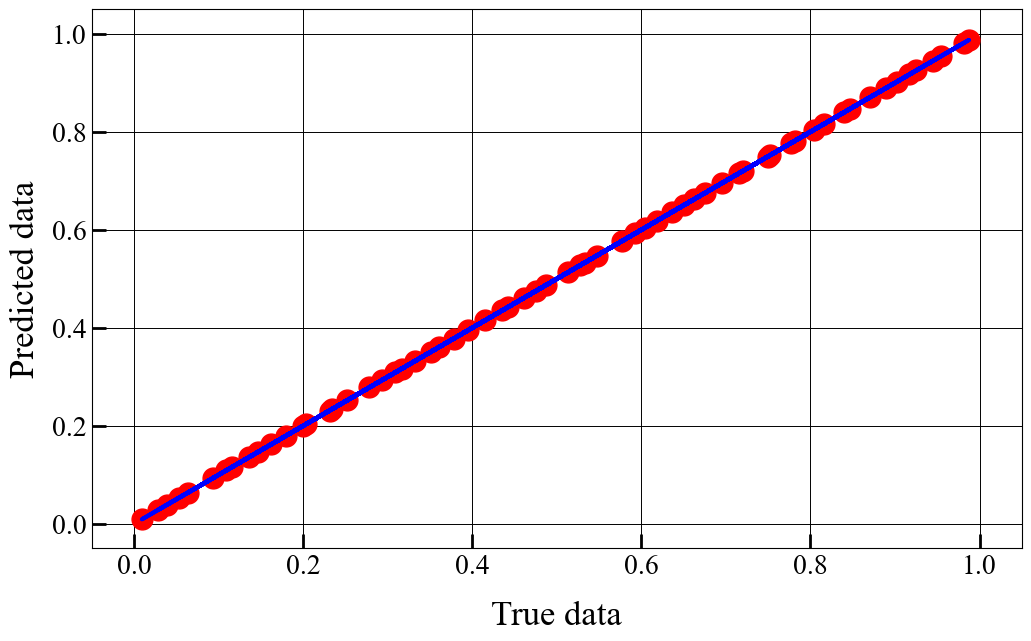

In [125]:
v=pr.main(ref=y,predict=predictors,save=True,y_name="Predicted data",
           x_name="True data",save_name="PR_Synthetic_fourth_2023")

In [126]:
rmse_plot=MetrPlot(sc_y="linear",y_name="$\\frac {RMSE}{concentration\ range}$",
                   x_name="Regularization coefficient",save_name="Fourth_synth_RMSE")

In [ ]:
0.9777167392785486
0.9869664883299265
0.9892792939426727
0.9781325910080341

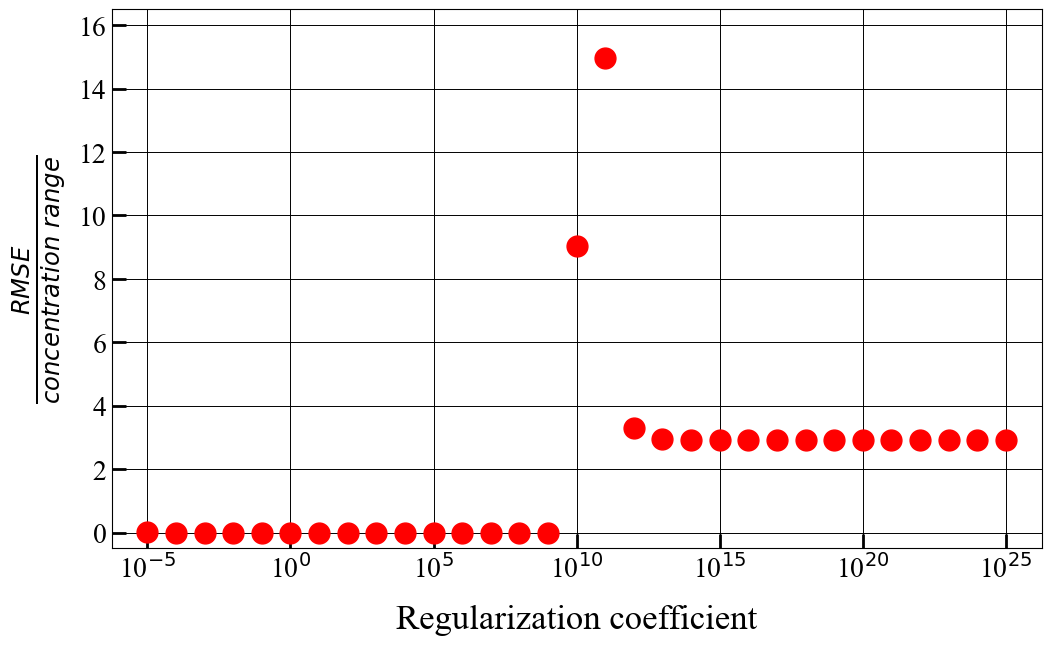

In [127]:
vv=rmse_plot.main(x=np.logspace(-25, 25,num = 51)[20:],
                  y=(mse_cv[20:]**0.5)/0.9781325910080341,
                  save=True)

In [128]:
mse_cv[19:],min(mse_cv[19:]),mse_cv[19:][8],np.logspace(-25, 25,num = 51)[19:][8]

(array([2.14656388e+06, 4.56922456e-05, 2.64855812e-07, 4.64206768e-09,
        6.16256726e-12, 1.02322647e-13, 5.50166689e-15, 8.62841524e-17,
        1.36102513e-19, 8.19179809e-18, 7.99777781e-16, 7.99258742e-14,
        7.97348360e-12, 7.77831846e-10, 5.48933873e-08, 2.00793218e-06,
        7.79155559e+01, 2.14467654e+02, 1.04491603e+01, 8.36771832e+00,
        8.18848870e+00, 8.17082378e+00, 8.16905985e+00, 8.16888348e+00,
        8.16886584e+00, 8.16886408e+00, 8.16886390e+00, 8.16886388e+00,
        8.16886388e+00, 8.16886388e+00, 8.16886388e+00, 8.16886388e+00]),
 1.3610251297551162e-19,
 1.3610251297551162e-19,
 100.0)

In [129]:
npls1=npls()
scoring={'mse': make_scorer(mean_squared_error),'r2':'r2'}
parametrsNames={'n_components': range(1,21),
                'a': [100]}

In [130]:
%%time
gridCought=GridSearchCV(npls1, parametrsNames, cv=5, scoring=scoring,refit='r2', return_train_score=True)
gridCought.fit(X_train.copy(),y_train.copy())

#gridCought.fit(X, y)
r2_p=gridCought.score(X_test.copy(), y_test.copy())
mse_cv=gridCought.cv_results_[ "mean_test_mse" ]
mse_c=gridCought.cv_results_[ "mean_train_mse" ]
r2_cv=gridCought.cv_results_[ "mean_test_r2" ]
r2_c=gridCought.cv_results_[ "mean_train_r2" ]

CPU times: user 25.7 s, sys: 505 ms, total: 26.2 s
Wall time: 46.6 s


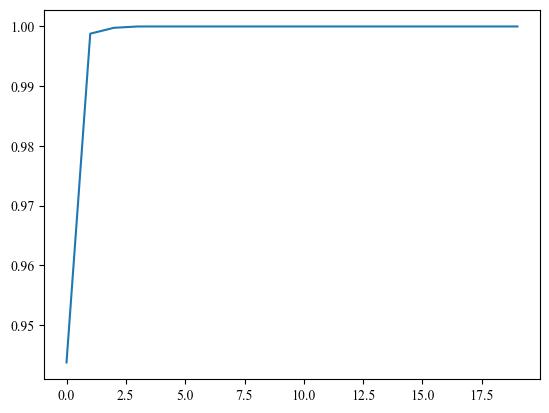

In [131]:
plt.plot(r2_cv)
plt.show()

In [132]:
rmse_second_plot=MetrPlot(sc_x="linear", sc_y="linear", y_name="$\\frac {RMSE}{concentration\ range}$",
                   x_name="Number of components",save_name="Fourth_synth_RMSE_com")

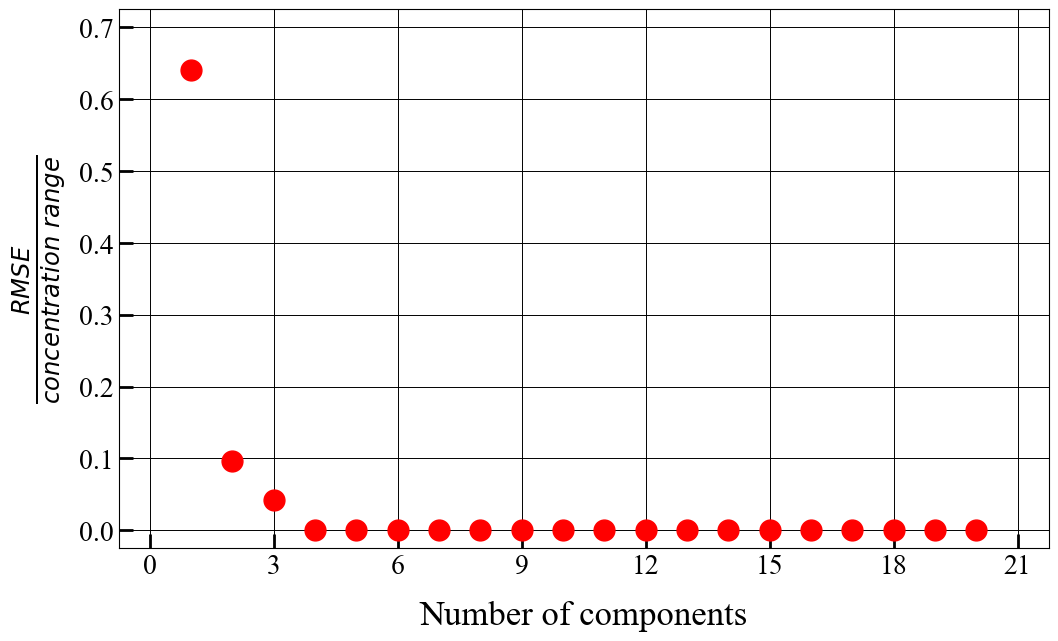

In [133]:
vv=rmse_second_plot.main(x=[i for i in range(1,21)], y=(mse_cv**0.5)/0.9892792939426727,
                         save=True)